In [1]:
import os

import numpy as np
import pandas as pd
from PIL import Image

import mplfinance as mpf
import matplotlib.pyplot as plt


In [8]:
def H(t, s):
    t = t.detach() # stop gradient
    s = softmax(s / tps, dim=1)
    t = softmax((t - C) / tpt, dim=1) # center + sharpen
    return - (t * log(s)).sum(dim=1).mean()


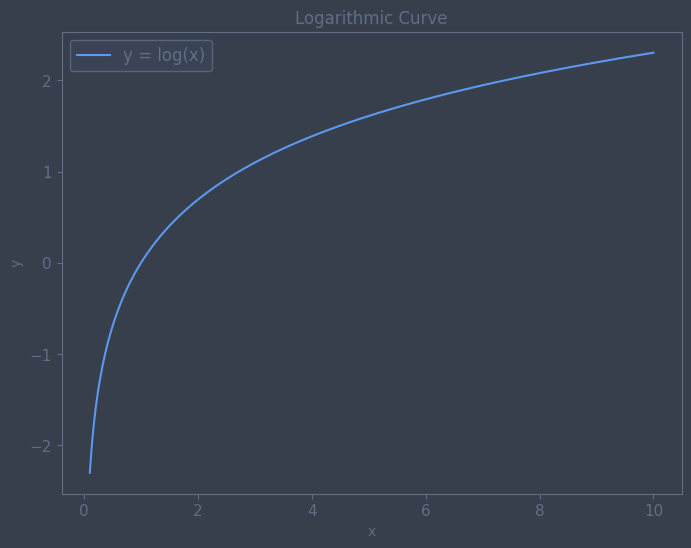

In [29]:
# Generate x values
x = np.linspace(0.1, 10, 400)  # Start from 0.1 to avoid log(0)
y = np.log(x)
# Create the figure and axis
fig, ax = plt.subplots(figsize=(8,6))
# Plot the curve
ax.plot(x, y, label='y = log(x)', color='#5c98ed')
# Set the title, labels, and legend
ax.set_title('Logarithmic Curve', color='#606e8a')
ax.set_xlabel('x', color='#606e8a')
ax.set_ylabel('y', color='#606e8a')
title_color = tick_color = legend_color = '#606e8a'
ax.tick_params(axis='x', colors=tick_color, labelsize=11)
ax.tick_params(axis='y', colors=tick_color, labelsize=11)
# Change the border outline to gray
for spine in ax.spines.values():
    spine.set_edgecolor('#606e8a')
# Change legend background to gray
legend = ax.legend(fontsize=12)
frame = legend.get_frame()
legend.get_frame().set_facecolor('#3c4557')
legend.get_frame().set_edgecolor('#606e8a')

frame.set_edgecolor(legend_color) 
for text in legend.get_texts():
    text.set_color(legend_color)
# Change the background color
ax.set_facecolor('#373e4c')
fig.set_facecolor('#373e4c')
# Change tick colors to white
# Display the plot
plt.show()

In [9]:
def calculate_ema(time_series, alpha):
    ema_values = []
    ema_previous = time_series[0]  # Initialize with the first value of the time series
    for x in time_series:
        ema_current = (1 - alpha) * ema_previous + alpha * x
        ema_values.append(ema_current)
        ema_previous = ema_current  # Update for the next iteration
    return ema_values

# Example Usage:
time_series = [1, 2, 3, 4, 5, 6, 7]
alpha = 0.1  # Example alpha value
ema_values = calculate_ema(time_series, alpha)
ema_values

[1.0, 1.1, 1.29, 1.561, 1.9049, 2.31441, 2.7829690000000005]

In [10]:
# Generate dummy stock data
np.random.seed(0)
dates = pd.date_range(start="1/1/2020", periods=100)
prices = 100 + np.cumsum(np.random.randn(100))  # Random walk
highs = prices + np.random.rand(100) * 2
lows = prices - np.random.rand(100) * 2
opens = prices + (np.random.rand(100) - 0.5) * 2
closes = prices + (np.random.rand(100) - 0.5) * 2
# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'Open': opens, 'High': highs, 'Low': lows, 'Close': closes})
data.set_index('Date', inplace=True)

# Define a function to generate and save basic line plots
def generate_and_save_line_plot(alpha, folder_path):
    ema = data['Close'].ewm(span=(2 / alpha - 1), adjust=False).mean()
    # Create a custom plot style
    mc = mpf.make_marketcolors(
        up='tab:green',down='tab:red',
        edge='inherit',
        wick='inherit',
        volume='inherit',
        ohlc='inherit'
    )
    s  = mpf.make_mpf_style(
        base_mpf_style='charles', 
        marketcolors=mc,
        gridcolor='#414b5d',
        gridstyle='-.',
        facecolor='#373e4c',  # Plot face color
        figcolor='#373e4c',
         rc={'axes.edgecolor': '#414b5d'}  # Border color
    )
    # Plot the candlestick chart with EMA
    ap = [mpf.make_addplot(ema, color='#5c98ed', label=f'EMA {alpha:.4g}')]
    fig, axes = mpf.plot(data, type='candle', style=s, 
                         ylabel='Price ($)', addplot=ap, figsize=(18, 8), returnfig=True)
    # Set title, x and y ticks, and legend text colors
    title_color = tick_color = legend_color = '#606e8a'
    # axes[0].set_title("Dummy Stock Price\nCandlestick with EMA\n")
    # Set title and y-label color
    axes[0].set_title(axes[0].get_title(), color=title_color, fontsize=20, fontweight='bold')
    axes[0].set_ylabel(axes[0].get_ylabel(), color=title_color, fontsize=18)
    # Set x and y ticks color
    axes[0].tick_params(axis='x', colors=tick_color, labelsize=14)
    axes[0].tick_params(axis='y', colors=tick_color, labelsize=14)
    # Set legend text color
    legend = axes[0].legend(fontsize=22)
    frame = legend.get_frame()
    frame.set_edgecolor(legend_color) 
    for text in legend.get_texts():
        text.set_color(legend_color)
    # Save the plot
    file_name = f"EMA_{alpha:.3f}.png"
    file_path = os.path.join(folder_path, file_name)
    plt.savefig(file_path)
    plt.close(fig)

In [32]:
# Create a folder to save the images
folder_path = "EMA_demo"
if not os.path.exists(folder_path):
    os.makedirs(folder_path) 
    
# Generate and save line plots for a range of alpha values
alpha_values = np.linspace(0.1, 0.996, 30)
for alpha in alpha_values:
    generate_and_save_line_plot(alpha, folder_path)
# Load the PNGs from the folder
image_files = [os.path.join(folder_path, f) for f in sorted(os.listdir(folder_path)) if f.endswith('.png')]
images = [Image.open(image_file) for image_file in image_files]
# Convert the PNGs into a GIF
gif_path = "EMA_animation.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], loop=0, duration=400)


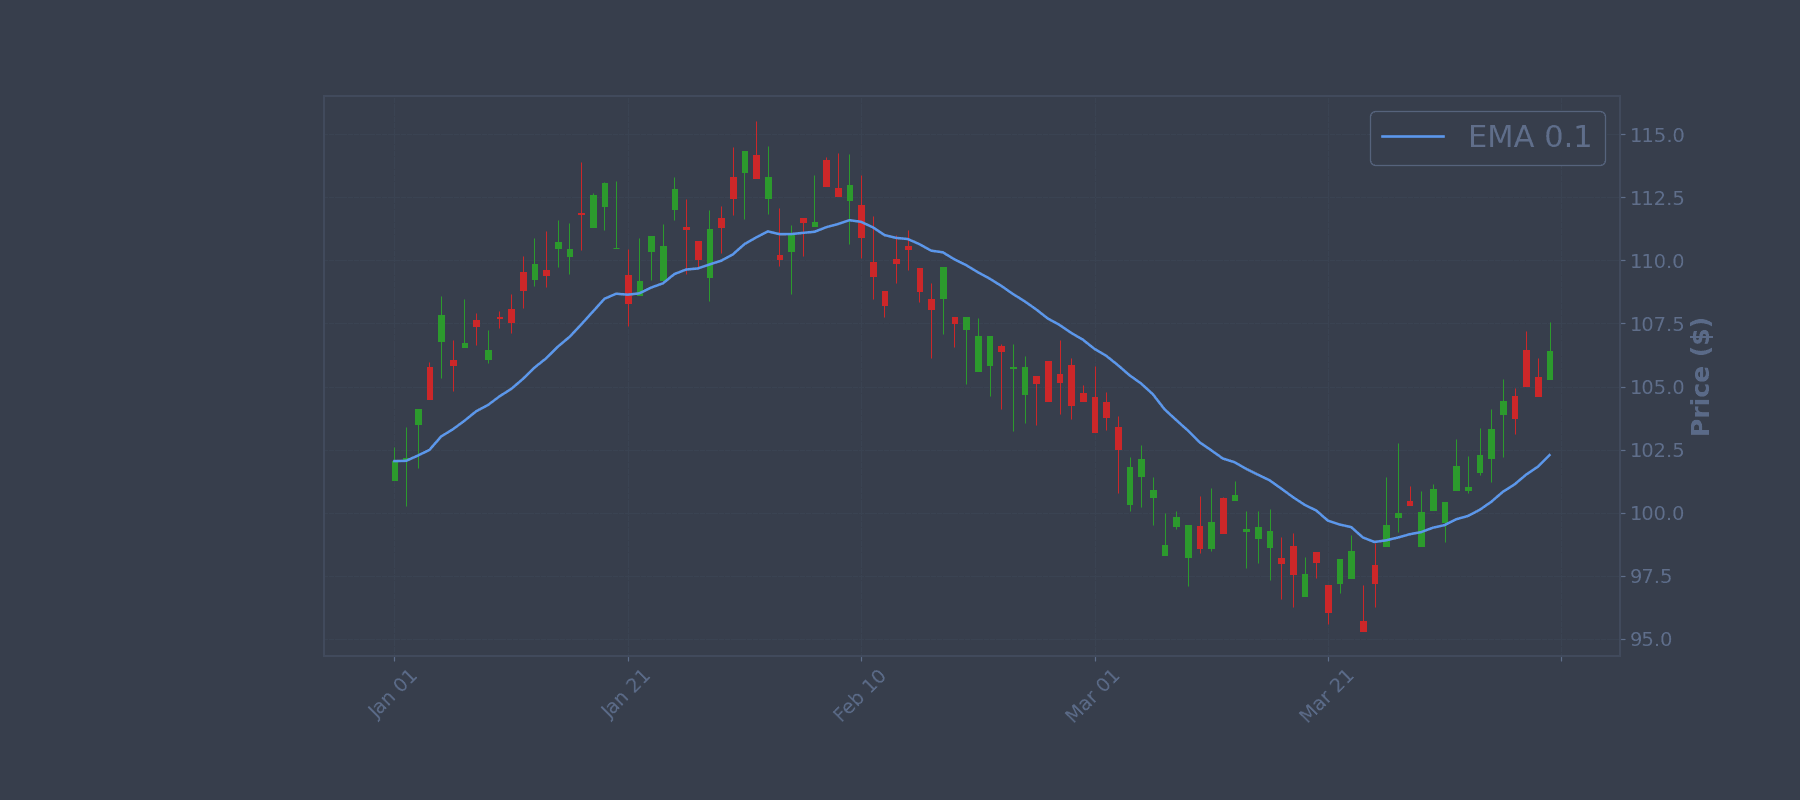

In [33]:
from IPython.display import display
from IPython.display import Image as IpyImage 
# Display the saved GIF in the notebook
display(IpyImage(filename=gif_path))